# Descriptive visualisations 
## Using *pandas* `plot()`

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In this Notebook we're going to take a quick look at a way to visualise data stored in a _pandas_ Series or DataFrame. We will, in a later part of the module, take a more in-depth look at producing visualisations of data - but for now we just want to be able to look at the content of our data in a quick and easy way.

Here we'll use _pandas_ `plot()` - because it's got a handful of useful keyword parameters, and throw in a couple of features from the more complex `matplotlib.pyplot` library that underpins the _pandas_ `plot()` code - just to show they're compatible.  

You can use `plot()` to get the majority of a chart plotted, then 'tweak' it with the `matplotlib.pyplot` facilities.

# Plotting a Series

In [2]:
# Remember the pandas Series data structure.
Aseries = pd.Series([1, 3, 2, 6, 5])
print(Aseries)

0    1
1    3
2    2
3    6
4    5
dtype: int64


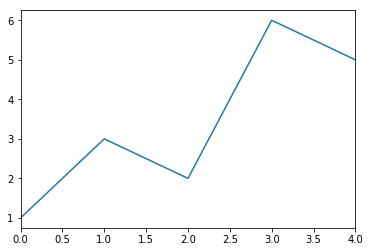

In [3]:
# Well here's how it looks as a very simple line plot.
Aseries.plot()

OK, well that doesn't look very interesting - what it has done is taken the `Aseries` values as the _y_ coordinate values and the `Aseries` index values as the _x_ coordinate values and joined the points they represent with a blue line. I'll add some axes names to show this.

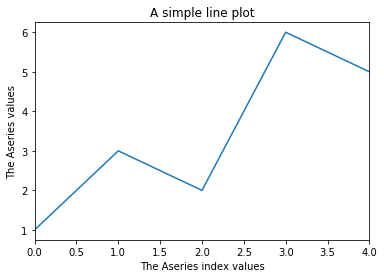

In [4]:
Aseries.plot(title='A simple line plot')
plt.xlabel('The Aseries index values')
plt.ylabel('The Aseries values')
# The plt methods are applied to the 'active' plot object, 
#     which isn't displayed until the end of the cell is reached.
# Note: in some versions of the Notebooks it is necessary to execute a plt.show() 
#       method to see the chart.
# plt.show()

Hmm, that still looks a bit messy - let's put some space around the _x_ and _y_ limits to show that the plot isn't just running off the chart edges.

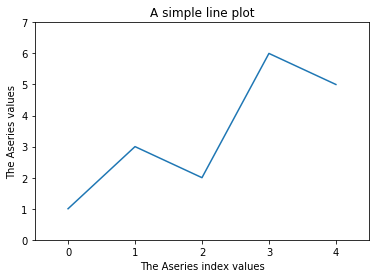

In [5]:
Aseries.plot(title='A simple line plot', xlim=(-0.5, 4.5), ylim=(0,7))
# xlim and ylim are tuples showing the lowest and highest values to show on the axes 
plt.xlabel('The Aseries index values')
plt.ylabel('The Aseries values')


I'd prefer a bar plot rather than a line plot, and blue really isn't my favourite colour right now.

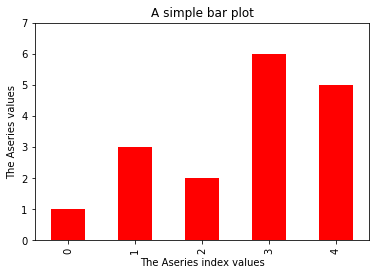

In [6]:
Aseries.plot.bar(title='A simple bar plot', xlim=(-0.5, 4.5), ylim=(0,7), color='red')
plt.xlabel('The Aseries index values')
plt.ylabel('The Aseries values')

And it could do with being drawn a bit bigger:

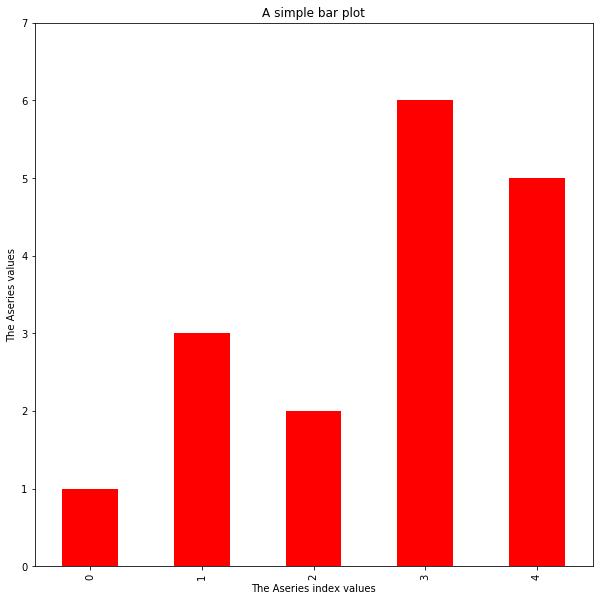

In [7]:
Aseries.plot.bar(title='A simple bar plot', xlim=(-0.5, 4.5), ylim=(0,7), 
                 color='red', figsize=(10,10))
plt.xlabel('The Aseries index values')
plt.ylabel('The Aseries values')
# figsize is (width, height) both in inches.

Not bad, but there's more.  Recall we could set our own index names - well `plot()` will use those too.

In [8]:
NewSeries = pd.Series([1, 4, 5, 7, 2], 
                      index=['Andy', 'Anne', 'Arnold', 'Arthur', 'Ardvark'])

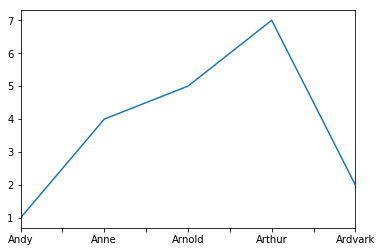

In [9]:
NewSeries.plot()
# Note that since we not included any additional instructions to plot
# the default is to produce a line plot

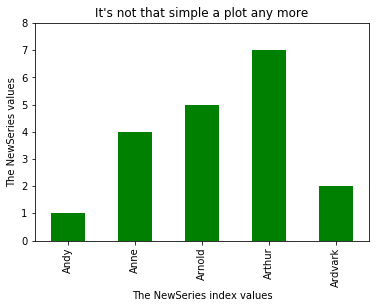

In [10]:
# We can do better than that.
NewSeries.plot.bar(title="It's not that simple a plot any more", 
                   xlim=(-1, 5), ylim=(0,max(NewSeries.values)+1), 
                   color='green')
plt.xlabel('The NewSeries index values')
plt.ylabel('The NewSeries values')

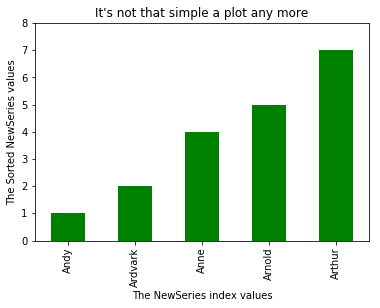

In [11]:
# And of course, a sorted Series will be plotted in sorted order:
NewSeries.sort_values(inplace=True)
NewSeries.plot.bar(title="It's not that simple a plot any more", 
                      xlim=(-1, 5), ylim=(0,max(NewSeries.values)+1),
                      color='green')
plt.xlabel('The NewSeries index values')
plt.ylabel('The Sorted NewSeries values')

One last thing - I'm told that simple bar charts should have the category value on the _y_-axis, and the values on the _x_-axis. It's such common practice there's a `plot()` specialisation for that too - the `barh` for bar-horizontal.

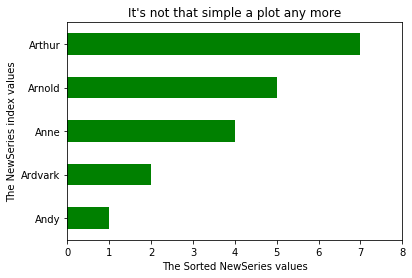

In [12]:
# BUT do remember you've just switched the v and y axes, so xlim and ylim need switching too!
#   Oh yes, and the xlabel and ylabel too.
NewSeries.sort_values(inplace=True)
NewSeries.plot.barh(title="It's not that simple a plot any more", 
                      ylim=(-1, 5), xlim=(0,max(NewSeries.values)+1), 
                      color='green')
plt.ylabel('The NewSeries index values')
plt.xlabel('The Sorted NewSeries values')

# Plotting from a DataFrame

The DataFrame structure can have several named columns, and each column is a Series; we can use these columns to plot two variables (one from one column, one from another).  This gives us an ability to plot without depending on the use of the index column.  (Having `plot()` use named index columns is a very useful way to plot data about named things (rows).)

We'll start with a simple DataFrame and chose which columns to use as our _x_ and _y_ value pairs to plot. This will allow us to create another kind of plot: a scatter plot.

In [13]:
# Here's our DataFrame - it has five columns: itemname, price, postcost, weight, size
# and we've created it with 9 rows.
PostData = pd.DataFrame( [('Box', 3, 10, 10, 3), ('Case', 8, 10,17,5), 
                          ('Drawer',12,23,32,12), ('Shelf', 52,23,46,17), 
                          ('Cabinet',7,10,27,9), ('Rack', 47,23,30,10), 
                          ('Bag',3,30,147,59), ('Hanger',30,23,62,23), 
                          ('Bracket', 3,30,92.5,37) ], 
                        columns=['itemname','price','postcost','weight','size'])
print(PostData)

  itemname  price  postcost  weight  size
0      Box      3        10    10.0     3
1     Case      8        10    17.0     5
2   Drawer     12        23    32.0    12
3    Shelf     52        23    46.0    17
4  Cabinet      7        10    27.0     9
5     Rack     47        23    30.0    10
6      Bag      3        30   147.0    59
7   Hanger     30        23    62.0    23
8  Bracket      3        30    92.5    37


Now let's plot `itemname` against `weight` as a horizontal bar chart.

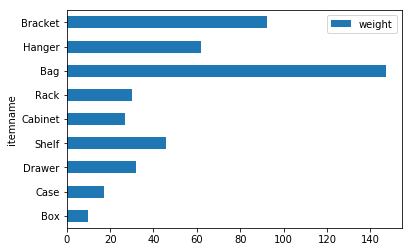

In [14]:
PostData.plot.barh(x='itemname', y='weight')

Here's a scatter plot of `size` against `postcost`; in the scatter plot, each point is shown as a dot.

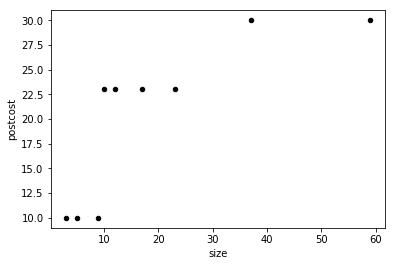

In [15]:
PostData.plot.scatter(x='size', y='postcost', color='black')

For this very small sample, there does seem to be some kind of relationship between `size` and `postcost`: as `size` increases so does `postcode` in a step manner.  

Scatter diagrams are good for getting a quick peek at how reasonable it is to look for a correlation between two variables (but of course, we need to treat correlation carefully).

## Exercise
Why not plot some other column pairs to see if there is any similar suggestions of correlations?

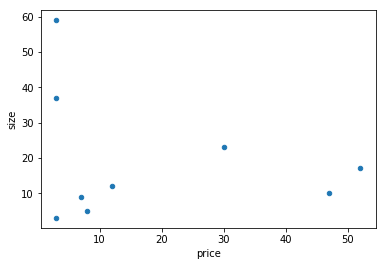

In [16]:
# Your turn. 
# PostData.plot(x='', y='', kind='scatter') 
PostData.plot(x='price',y='size', kind='scatter')

# More than one DataFrame column on the same chart

A DataFrame has multiple columns.  What happens if we just tell `plot()` which to use as the _x_ axis and leave it to decide what to do with the other columns?

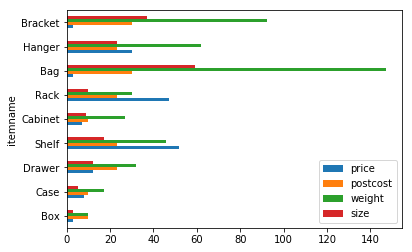

In [17]:
PostData.plot.barh(x='itemname')

OK, that's neat: `plot()` has spotted the multiple columns and plotted each one in a different colour and shown us what the relationship is between colour and column name (The mini-table is called a legend.)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7da03c5358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7da029aa58>], dtype=object)

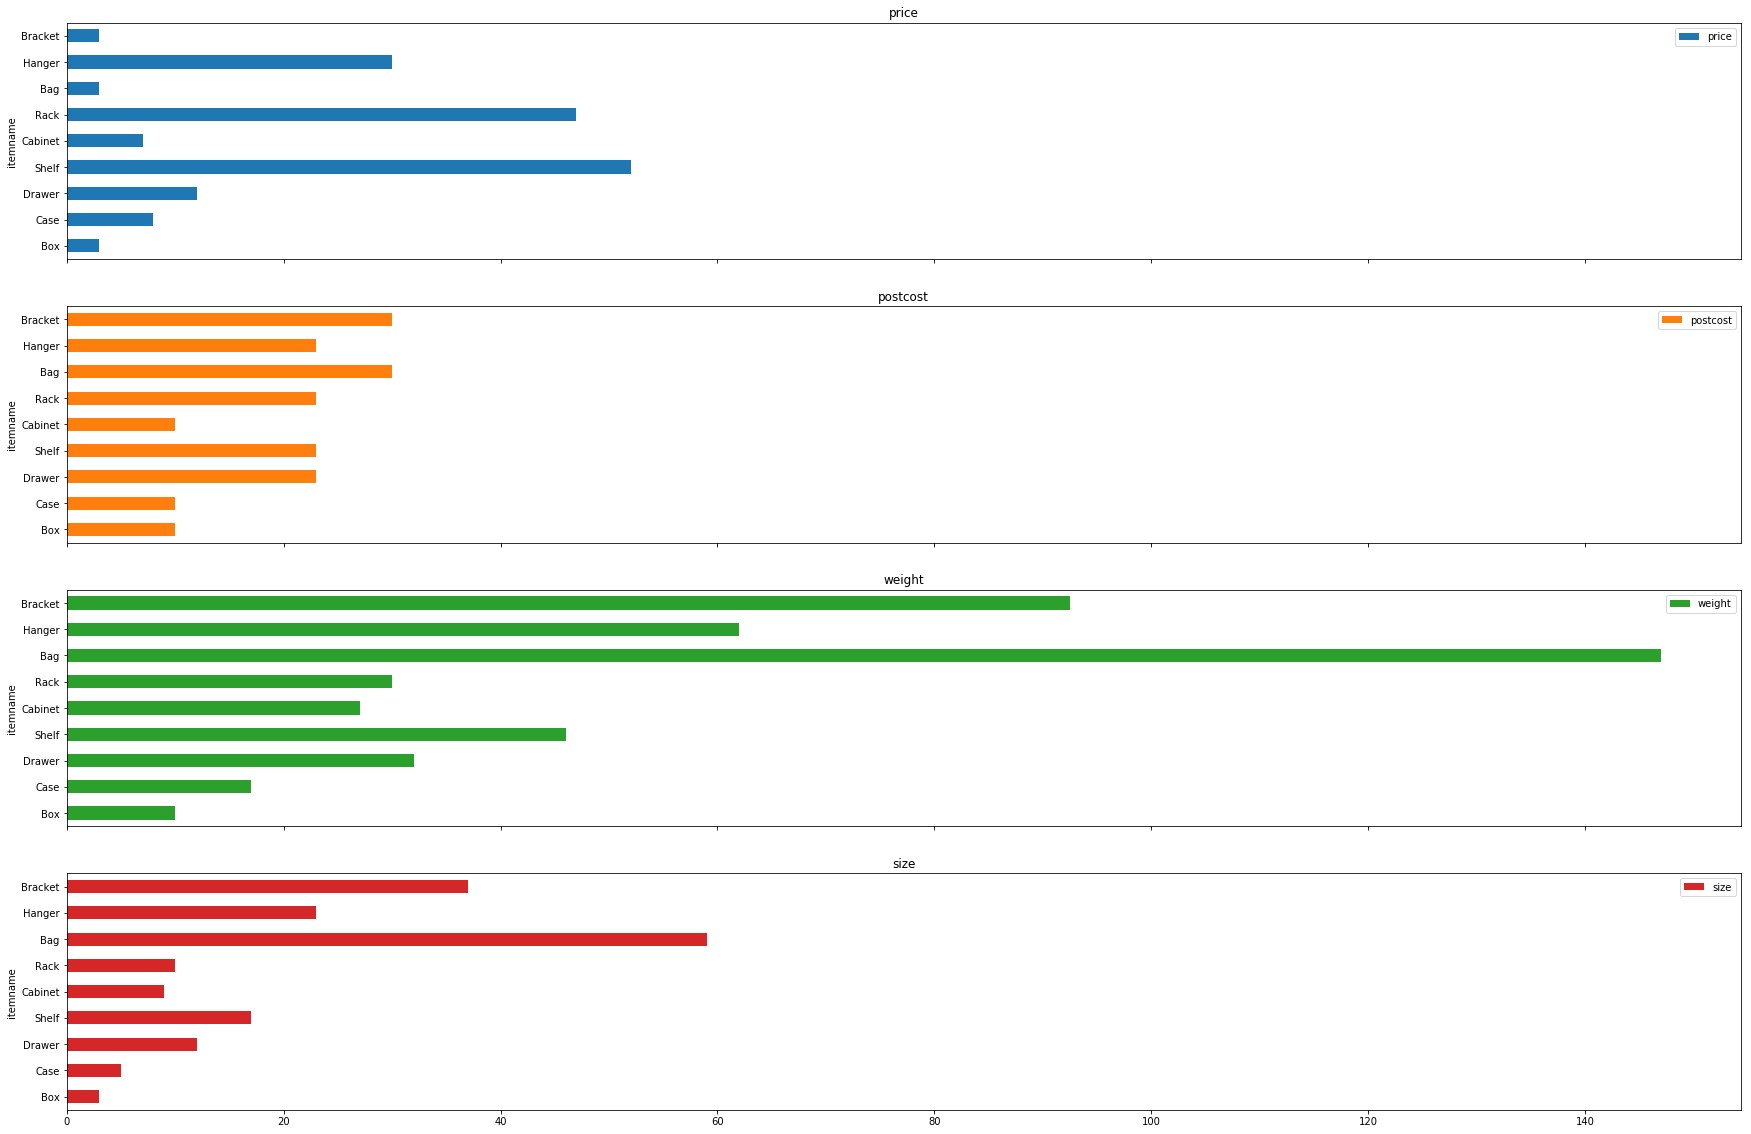

In [18]:
# By setting the parameter subplots to 'True', we can plot each column in its own subplot.
PostData.plot.barh(x='itemname', subplots='True', figsize=(30,20))

We also have control over which columns to include on the _y_-axis by supplying a list for the `y` parameter.

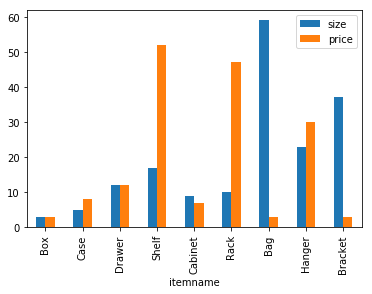

In [19]:
PostData.plot.bar(x='itemname', y=['size','price'])

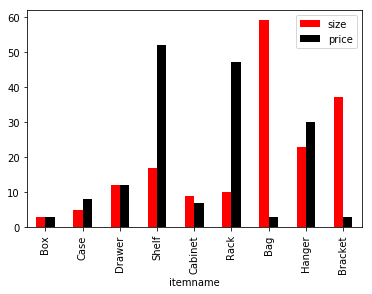

In [20]:
# Since we have multiple columns, we need a list if we're going to set our own colours.
PostData.plot.bar(x='itemname', y=['size','price'], color=['red','black'])

`plot()` detects when datatypes in the columns wouldn't make for a sensible plot; in the following cell we've plotted `postcost` as the _x_-axis, and left `plot()` to sort out the rest. Since `itemname` wouldn't be sensible to plot on a numeric scale, it's omitted.  

Note: because bar charts are usually used to represent catagorical data, the `postcost` values are not sorted on the axis, although we could if we chose.

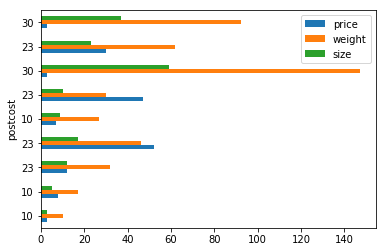

In [21]:
PostData.plot.barh(x='postcost')

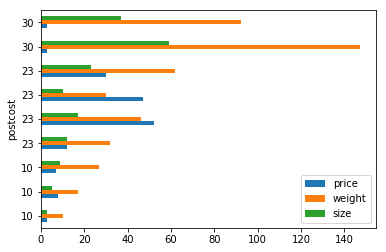

In [24]:
PostData.sort_values('postcost').plot.barh(x='postcost')

There's a variation on the `bar` and `barh` plot specialisations when plotting multiple values - you can stack the columns into a single bar.

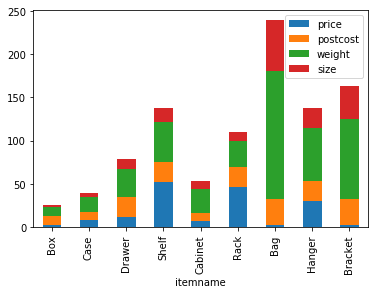

In [30]:
PostData.plot.bar(x='itemname', stacked='True')

Finally, if you don't like the colour scheme chosen by `plot()`, you can apply one from a range of built-in colour maps (just put `'x'` as the name of the colormap to see what names are possible; they get listed at the end of the error message).

ValueError: Colormap x is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

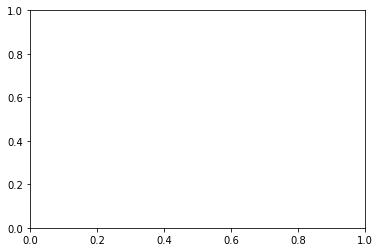

In [31]:
PostData.plot.bar(x='itemname', y=['price','postcost'], stacked='true', colormap='x')

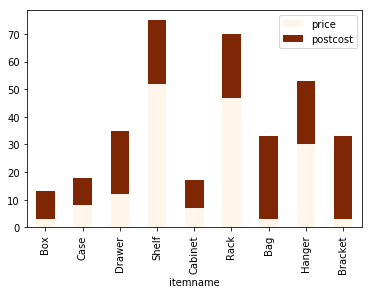

In [32]:
PostData.plot.bar(x='itemname', y=['price','postcost'], stacked='true', colormap='Oranges')

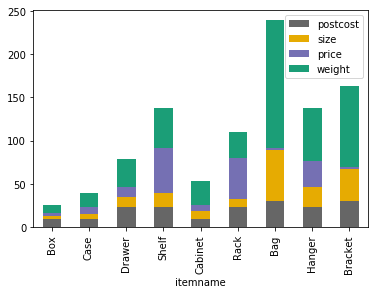

In [33]:
# And using the list form for y, you can reorder the way the columns stack.
PostData.plot.bar(x='itemname', y=['postcost','size', 'price', 'weight'], 
                stacked='true', colormap='Dark2_r')

### Another use for `colormap`
Now that we've seen the `colormap` parameter we can do one more thing on scatter diagram: using an additional column.

We can plot two variables onto the chart, and colour each dot based on the values in a third column.
In the plot below, the `c` parameter is the column name whose value determines the colour of the dot used in the scatter plot.

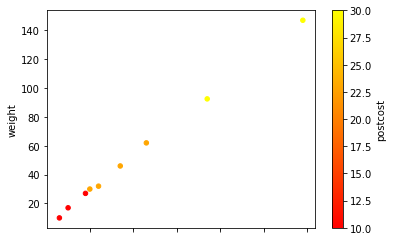

In [34]:
PostData.plot.scatter(x='size', y='weight', c='postcost', colormap='autumn')

It doesn't look very impressive with only nine elements in the DataFrame, but this is another way of spotting clustering and grouping within values in a DataFrame.

## Summary
This has been a very quick overview of the `plot()` method and its specialisations (`bar`, `barh`, `scatter`, `line`).   Later in the module we'll look in more detail at visualisation, and other examples of plot types that are available from _pandas_ `plot()` and the `matplotlib` library.

In this Notebook we've looked at:

- `plot()` using *pandas* Series and DataFrames (including using multiple columns)
- line, bar, bar-horizontal and scatter plots
- using index values as catagory labels in bar charts
- setting the title for the chart and the axes
- using sorting, colour, colour maps and axes limit parameters to make the chart look tidier.

That's probably sufficient for this point in the module.

# What next?

If you are working through this Notebook as part of an inline exercise, return to the module materials now.

If you are working through this set of Notebooks as a whole, move on to `04.5 Split-apply-combine with SQL and pandas`.

Note: Notebook `04.4 Activity 4.4 walkthrough` accompanies Activity 4.4 in Part 4.